In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv")

numrows = 25549

k_df = pd.DataFrame({'today' : [0.0]*numrows,
                      "tomorrow" : [True]*numrows})

seq = ["today",
       "tomorrow"]

k_df = k_df.reindex(columns=seq)

for i in range(0 , numrows):
    tomorrow = df.iloc[i,1]
    today = df.iloc[(i-1),1]
    
    k_df.iat[i,1] = tomorrow
    k_df.iat[i,0] = today
    
k_df = k_df.dropna()

In [4]:
k_df.head()

,today,tomorrow
0,0.00,True
1,0.47,True
2,0.59,True
3,0.42,True
4,0.31,True


In [12]:
X = StandardScaler().fit_transform(k_df)
X

array([[-0.44441297,  1.15898221],
       [ 1.52183213,  1.15898221],
       [ 2.02385215,  1.15898221],
       ...,
       [-0.44441297, -0.86282601],
       [-0.44441297, -0.86282601],
       [-0.44441297, -0.86282601]])

In [20]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

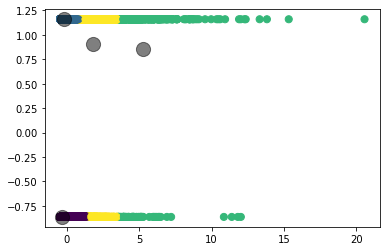

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers =centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);